<a href="https://colab.research.google.com/github/akshaygrao77/Deep-learning-assignment1/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
# Only used to show progressbar while inside an epoch
from tqdm.notebook import tqdm 

In [ ]:
!pip install wandb
!wandb login

wandb: Currently logged in as: akshaygrao (use `wandb login --relogin` to force relogin)


In [ ]:
import wandb

wandb.init(project="Deep learning assignment1", entity="akshaygrao")

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


# **Question 1 starts**

Loading dataset from fashio-mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
def print_image_per_class():
  num_class=10
  for cls in range(num_class):
    i=0
    while(True):
      i=i+1
      if(y_train[i] == cls):
        # image = x_train[i]
        plt.imshow( x_train[i], cmap='gray')
        plt.show()
        plt.close()
        break;

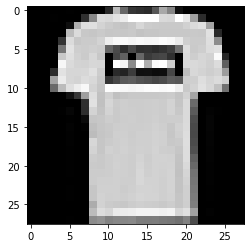

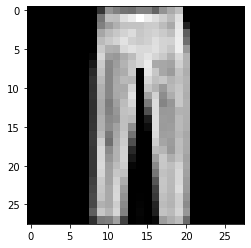

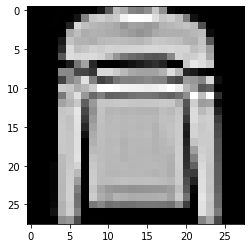

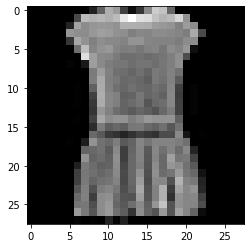

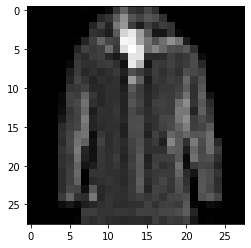

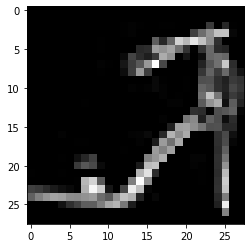

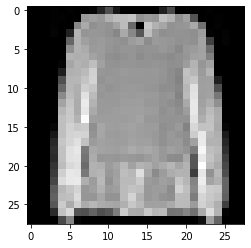

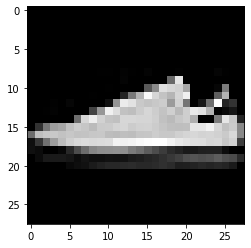

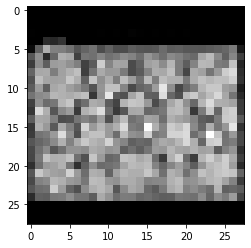

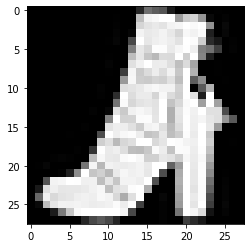

In [ ]:
print_image_per_class()

# **Question 2 starts**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

Flatten each image into a 1-d array to input to the network

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

Normalise the array to [0,1] interval

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_test.shape

(10000, 784)

Categorical encoding for labels

In [ ]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_test = keras.utils.to_categorical(y_test, num_categories)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
class Activation:
    def computeSoftmaxGrad(self,H):
      grad_softmax_jacobian = np.zeros(H.shape[0]*H.shape[0]).reshape(H.shape[0],H.shape[0])
      for i in range(H.shape[0]):
        for j in range(H.shape[0]):
          if(i == j):
            grad_softmax_jacobian[i][j] = H[i]*(1-H[j])
          else:
            grad_softmax_jacobian[i][j] = -H[i]*H[j]
      return grad_softmax_jacobian
  
    def computeSigmoidGrad(self,H):
      # print("Grad Sigmoid ",H)
      # print("number of non-zeros in H:",np.count_nonzero(H))
      ret = H*(1-H)
      # print("Ret ",ret)
      # print("number of non-zeros in ret:",np.count_nonzero(ret))
      return ret 

    def computeTanhGrad(self,H):
      ret = 1 - H**2
      if(~(np.isfinite(ret).all())):
        if(np.isnan(ret).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("Gradient Tanh ret",ret)
        ret = replaceNanWithMaxAndMin(ret)
      return ret 
    
    def computeReluGrad(self,A):
       return 1.0 * (A > 0)

    def sigmoid(self, X):
      # print("Sigmoid",X)
      exp = np.exp(-X)
      # print("Exp:",exp)
      if(~(np.isfinite(exp).all())):
        if(np.isnan(exp).any()):
          print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
          print("Sigmoid X",X)
          print("Sigmoid exp before",exp)
        exp = replaceNanWithMaxAndMin(exp)
      
      ret = 1.0 / (1.0 + exp)
      # print("Ret sigmoid:",ret)
      return ret

    def relu(self,X):
      ret = np.maximum(0.0,X)
      return ret
    
    def tanh(self,X):
      ret = np.tanh(X)
      if(~(np.isfinite(ret).all())):
        if(np.isnan(ret).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("Tanh ret",ret)
        ret = replaceNanWithMaxAndMin(ret)
      return ret

    def softmax(self, X):
      Z = X-max(X)
      exps = np.exp(Z)
      if(~(np.isfinite(exps).all())):
        if(np.isnan(exps).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax X",X)
          print("softmax exps",exps)
        exps = replaceNanWithMaxAndMin(exps)
      
      sum = np.sum(exps)
      if(~(np.isfinite(sum).all())):
        if(np.isnan(sum).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax sum",sum)
        sum = replaceNanWithMaxAndMin(sum)

      ret = exps / sum
      if(~(np.isfinite(ret).all())):
        if(np.isnan(ret).any()):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax exps",exps)
          print("softmax sum",sum)
          print("softmax ret",ret)
        ret = replaceNanWithMaxAndMin(ret)

      if(~(np.isfinite(ret).all())):
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
          print("softmax X",X)
          print("softmax np.sum(exps)",np.sum(exps))
          print("softmax exps",exps)
      return ret

In [ ]:
  def replaceNanWithMaxAndMin(X):
    if(np.isscalar(X)):
      if(X == float("inf")):
          X = 1e+306
      elif(X == float("-inf")):
          X = 1e-306
      else:
        X = 1e-306
    else:
      if(~(np.isfinite(X).all())):
        nan_indices = np.argwhere(~(np.isfinite(X))).flatten()
        # print("nan_indices",nan_indices)
        for ind in nan_indices:
          # print("Ind",ind)
          # print("X[ind]",X[ind])
          if(X[ind] == float("inf")):
            X[ind] = 1e+306
          elif(X[ind] == float("-inf")):
            X[ind] = 1e-306
          else:
            X[ind] = 1e-306
    return X
      

In [ ]:
class InputLayer:
  number_of_inputs=0

  def __init__(self,number_of_inputs) -> None:
      self.number_of_inputs = number_of_inputs

In [ ]:
class Layer:
  number_of_neurons=0
  activation = 'sigmoid'
  # Weight intialization before layer to which current layer is defined(hence invalid on input layer)
  weight_initialization= None
  
  def __init__(self,number_of_neurons,activation) -> None:
      self.number_of_neurons = number_of_neurons
      self.activation = activation
      self.weight_initialization= None

In [ ]:
def xavierWeightInitialisation(num_previous_layer,num_next_layer): 
  # calculate the range for the weights
  lower, upper = -(math.sqrt(6.0) / math.sqrt(num_previous_layer + num_next_layer)), (math.sqrt(6.0) / math.sqrt(num_previous_layer + num_next_layer))
  # generate random numbers
  numbers = np.random.rand(num_previous_layer,num_next_layer)
  # scale to the desired range
  scaled = lower + numbers * (upper - lower)
  return scaled

def standardNormalInitialisation(num_previous_layer,num_next_layer): 
  return np.random.normal(size=(num_previous_layer,num_next_layer))

In [ ]:
class ANNModel:
  def __init__(self):
    self.layers = []

  def addInputLayer(self,input_layer_obj):
    self.input_layer_obj = input_layer_obj
  
  def addLayer(self,layer_obj):
    self.layers.append(layer_obj)
  
  def compile(self,loss,weight_init='stdnormal'):
    self.loss = loss
    self.randInitWeights(weight_init)
    self.randInitBiases()
    self.initAH()
    self.array_grad_L_by_A = [None]*(len(self.layers))
    self.array_grad_L_by_weight = [None]*(len(self.layers))
    self.array_grad_L_by_bias = [None]*(len(self.layers))
    self.array_grad_L_by_H = [None]*(len(self.layers))
    
  def initAH(self):
    self.A = []
    for l in range(len(self.layers)):
      self.A.append(np.zeros(self.layers[l].number_of_neurons))
    
    self.H = []
    self.H.append(np.zeros(self.input_layer_obj.number_of_inputs))
    for l in range(1,len(self.layers)+1):
      self.H.append(np.zeros(self.layers[l-1].number_of_neurons))
    
    # print(self.A)
    # print(self.H)

  def randWeightEachLayer(self,weight_init,num_previous_layer,num_next_layer):
    if(weight_init == 'stdnormal'):
      return standardNormalInitialisation(num_previous_layer,num_next_layer)
    elif(weight_init == 'xavier'):
      return xavierWeightInitialisation(num_previous_layer,num_next_layer)

  def randInitWeights(self,weight_init_overall):
    current_layer_weight_init = weight_init_overall
    if(not (self.layers[0].weight_initialization is None)):
      current_layer_weight_init = self.layers[0].weight_initialization
    self.weight_array=[self.randWeightEachLayer(current_layer_weight_init,self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons)]
    print("Weight init [0]:",current_layer_weight_init)
    
    for l in range(1,len(self.layers)):
      current_layer_weight_init = weight_init_overall
      if(not (self.layers[l].weight_initialization is None)):
        current_layer_weight_init = self.layers[l].weight_initialization
      
      print("Weight init [",l," ]:",current_layer_weight_init)
      self.weight_array.append(self.randWeightEachLayer(current_layer_weight_init,self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons))
      

  def randInitBiases(self):
    self.bias = []
    for l in range(len(self.layers)):
      self.bias.append(np.zeros(self.layers[l].number_of_neurons))
      # print(self.bias)
      # print(self.bias[l].shape)

  def predict(self,x_test):
    y_pred = [None]*x_test.shape[0]
    for index in range(x_test.shape[0]):
      y_pred[index] = self.feed_forward(x_test[index])
    y_pred = np.asarray(y_pred)
    return y_pred
  
  def initializeOptimizerStructures(self,optimizer='vanilla'):
    if(optimizer == 'momentum' or optimizer =='rmsprop'):
      self.prev_weight_update=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      for l in range(1,len(self.layers)):
        self.prev_weight_update.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
      
      self.prev_bias_update = []
      for l in range(len(self.layers)):
       self.prev_bias_update.append(np.zeros(self.layers[l].number_of_neurons))
    elif(optimizer == 'nesterov'):
      self.prev_weight_update=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      self.rollback_weight_update=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      for l in range(1,len(self.layers)):
        self.prev_weight_update.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
        self.rollback_weight_update.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
      
      self.prev_bias_update = []
      self.rollback_bias_update = []
      for l in range(len(self.layers)):
       self.prev_bias_update.append(np.zeros(self.layers[l].number_of_neurons))
       self.rollback_bias_update.append(np.zeros(self.layers[l].number_of_neurons))
    
    elif(optimizer == 'adam'):
      self.m_w=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      self.v_w=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      self.m_w_hat=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      self.v_w_hat=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
      for l in range(1,len(self.layers)):
        self.m_w.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
        self.v_w.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
        self.m_w_hat.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
        self.v_w_hat.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
      
      self.m_b = []
      self.v_b = []
      self.m_b_hat = []
      self.v_b_hat = []
      for l in range(len(self.layers)):
       self.m_b.append(np.zeros(self.layers[l].number_of_neurons))
       self.v_b.append(np.zeros(self.layers[l].number_of_neurons))
       self.m_b_hat.append(np.zeros(self.layers[l].number_of_neurons))
       self.v_b_hat.append(np.zeros(self.layers[l].number_of_neurons))
      
      self.update_count = 0
  
  def resetAccumulatedWeightsAndBiases(self):
    self.accumulated_array_grad_L_by_weight=[np.zeros((self.input_layer_obj.number_of_inputs,self.layers[0].number_of_neurons))]
    for l in range(1,len(self.layers)):
      self.accumulated_array_grad_L_by_weight.append(np.zeros((self.layers[l-1].number_of_neurons,self.layers[l].number_of_neurons)))
    self.accumulated_array_grad_L_by_bias = []
    for l in range(len(self.layers)):
      self.accumulated_array_grad_L_by_bias.append(np.random.rand(self.layers[l].number_of_neurons))
  
  # x_valid and y_valid is used only to just check test accuracy during each epoch. It is strictly not part of training
  def train(self,x_train,y_train,epochs,optimizer='vanilla',learning_rate=1,verbose=1,batch_size=10,l2_weight_decay=None,x_valid=None,y_valid=None):
    self.l2_weight_decay = l2_weight_decay
    self.resetAccumulatedWeightsAndBiases()
    num_points_seen = 0
    self.initializeOptimizerStructures(optimizer)
    self.verbose=verbose
    if(self.verbose >= 4):
      self.print_state()
    for current_epoch in range(epochs):
      self.current_epoch = current_epoch
      if(self.verbose >=2):
        print("\n &&&&&&&&&&&&&&&&&&&&  Epoch ",current_epoch," &&&&&&&&&&&&&&&&&&&&&&&&")
      sum_of_loss = 0
      # for index in tqdm(range(10)):
      for index in tqdm(range(x_train.shape[0])):
        if(self.verbose >= 3):
          print("Data point number:",index)
        y_pred = self.feed_forward(x_train[index])
        self.back_prop(y_pred,y_train[index])
        if (optimizer == 'nesterov'):
          gamma = 0.9
          # First backup current parameters(to reset and continue training later)
          for l in range(len(self.layers)):
            self.rollback_weight_update[l] = self.weight_array[l]
            self.rollback_bias_update[l] = self.bias[l]
          # Set lookahead parameters into network
          for l in range(len(self.layers)):
            self.weight_array[l] = self.weight_array[l] - (gamma)*self.prev_weight_update[l]
            self.bias[l]=self.bias[l] - (gamma)*self.prev_bias_update[l]
          #Feed forward with lookahead parameters
          y_pred = self.feed_forward(x_train[index])
          #Back propogate to get the grad_L_byW_lookahead
          self.back_prop(y_pred,y_train[index])
          #Accumulate grad_L_by_W_lookahead
          for l in range(len(self.layers)):
            self.accumulated_array_grad_L_by_weight[l] = self.accumulated_array_grad_L_by_weight[l] + self.array_grad_L_by_weight[l]
            self.accumulated_array_grad_L_by_bias[l] = self.accumulated_array_grad_L_by_bias[l] + self.array_grad_L_by_bias[l]
          #Use previous backup to roll back parameters
          for l in range(len(self.layers)):
            self.weight_array[l] = self.rollback_weight_update[l]
            self.bias[l] = self.rollback_bias_update[l]
        else:
          for l in range(len(self.layers)):
            self.accumulated_array_grad_L_by_weight[l] = self.accumulated_array_grad_L_by_weight[l] + self.array_grad_L_by_weight[l]
            self.accumulated_array_grad_L_by_bias[l] = self.accumulated_array_grad_L_by_bias[l] + self.array_grad_L_by_bias[l]
        
        num_points_seen = num_points_seen + 1
        
        if(self.verbose >= 3):
          print("Predicted output:",y_pred)
          print("Actual output:",y_train[index])
        current_loss = computeLoss(y_pred,y_train[index],self.loss)
        sum_of_loss = sum_of_loss + current_loss
        if(self.verbose >= 4):
          self.print_state()
        if(self.verbose >= 3):
          print("Loss:",current_loss)
        
        if(num_points_seen % batch_size == 0 or num_points_seen == x_train.shape[0]):
          self.updateParameters(optimizer,learning_rate)
          self.resetAccumulatedWeightsAndBiases()
      
      avg_loss = sum_of_loss/x_train.shape[0]
      wandb.log({"avg_loss_on_current_epoch": avg_loss,"epoch":self.current_epoch})
      if(self.verbose >= 2):
        print("Average ",self.loss, " loss: ",avg_loss)
        self.showTrainAndTestAccuracyPostTraining(x_train,y_train,x_valid,y_valid)
  
  def showTrainAndTestAccuracyPostTraining(self,x_train,y_train,x_valid,y_valid):
    y_pred_train = self.predict(x_train)
    train_accuracy = calculateClassificationAccuracy(y_pred_train,y_train)
    print("Train accuracy ",train_accuracy)
    wandb.log({"train_accuracy_on_current_epoch": train_accuracy,"epoch":self.current_epoch})
    if(not(x_valid is None or y_valid is None)):
      y_pred_test = self.predict(x_valid)
      test_accuracy = calculateClassificationAccuracy(y_pred_test,y_valid)
      print("Validation accuracy ",test_accuracy)
      wandb.log({"valid_accuracy_on_current_epoch": test_accuracy,"epoch":self.current_epoch})

  def updateParameters(self,optimizer='vanilla',learning_rate=1):
    for l in range(len(self.layers)):
      allzeros = not np.any(self.accumulated_array_grad_L_by_weight[l])
      if(allzeros == True):
        # self.verbose=4.5
        print("Weight update zero %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
        print("self.accumulated_array_grad_L_by_weight[",l,"]:",self.accumulated_array_grad_L_by_weight[l])

    
    if(optimizer == 'vanilla'):
      for l in range(len(self.layers)):
        self.weight_array[l] = self.weight_array[l] - (learning_rate)*self.accumulated_array_grad_L_by_weight[l]
        self.bias[l]=(self.bias[l] - (learning_rate)*self.accumulated_array_grad_L_by_bias[l])[0]
    
    elif(optimizer == 'nesterov'):
      gamma = 0.9

      for l in range(len(self.layers)):
        self.prev_weight_update[l] = gamma * self.prev_weight_update[l] + (learning_rate)* self.accumulated_array_grad_L_by_weight[l]
        self.prev_bias_update[l] = (gamma * self.prev_bias_update[l] + (learning_rate)* self.accumulated_array_grad_L_by_bias[l])[0]  
        self.weight_array[l] = self.weight_array[l] - self.prev_weight_update[l]
        self.bias[l]=self.bias[l] - self.prev_bias_update[l]
    
    elif(optimizer == 'momentum'):
      gamma = 0.9

      for l in range(len(self.layers)):
        self.prev_weight_update[l] = gamma * self.prev_weight_update[l] + (learning_rate)* self.accumulated_array_grad_L_by_weight[l]
        self.prev_bias_update[l] = (gamma * self.prev_bias_update[l] + (learning_rate)* self.accumulated_array_grad_L_by_bias[l])[0]  
        self.weight_array[l] = self.weight_array[l] - self.prev_weight_update[l]
        self.bias[l]=self.bias[l] - self.prev_bias_update[l]
    
    elif(optimizer == 'rmsprop'):
      eps,beta1 = 1e-10,0.9

      for l in range(len(self.layers)):
        self.prev_weight_update[l] = beta1 * self.prev_weight_update[l] + (1 - beta1)* (self.accumulated_array_grad_L_by_weight[l] * self.accumulated_array_grad_L_by_weight[l])
        # print("self.prev_weight_update[l]",self.prev_weight_update[l])
        self.prev_bias_update[l] = (beta1 * self.prev_bias_update[l] + (1 - beta1)* (self.accumulated_array_grad_L_by_bias[l]*self.accumulated_array_grad_L_by_bias[l]))[0]  
        # print("self.prev_bias_update[l]",self.prev_bias_update[l])
        self.weight_array[l] = self.weight_array[l] - (learning_rate/np.sqrt(self.prev_weight_update[l] + eps)) * self.accumulated_array_grad_L_by_weight[l]
        # print("self.weight_array[l]",self.weight_array[l])
        self.bias[l] = self.bias[l] - ((learning_rate / np.sqrt(self.prev_bias_update[l] + eps)) * self.accumulated_array_grad_L_by_bias[l])[0]
        # print("self.bias[l]",self.bias[l])
        # print("self.bias[l] shape",self.bias[l].shape)
    
    elif(optimizer == 'adam'):
      eps,beta1,beta2 = 1e-8,0.9,0.999

      self.m_w[l] = beta1 * self.m_w[l] + (1 - beta1)* self.accumulated_array_grad_L_by_weight[l]
      self.m_b[l] = (beta1 * self.m_b[l] + (1 - beta1)* self.accumulated_array_grad_L_by_bias[l])[0]  

      self.v_w[l] = beta2 * self.v_w[l] + (1 - beta2)* (self.accumulated_array_grad_L_by_weight[l] * self.accumulated_array_grad_L_by_weight[l])
      self.v_b[l] = (beta2 * self.v_b[l] + (1 - beta2)* (self.accumulated_array_grad_L_by_bias[l]*self.accumulated_array_grad_L_by_bias[l]))[0]

      self.m_w_hat[l] = self.m_w[l]/(1- math.pow(beta1,self.update_count + 1))
      self.m_b_hat[l] = self.m_b[l] / (1-math.pow(beta1,self.update_count + 1))

      self.v_w_hat[l] = self.v_w[l]/(1- math.pow(beta2,self.update_count + 1))
      self.v_b_hat[l] = self.v_b[l] / (1-math.pow(beta2,self.update_count + 1))

      self.weight_array[l] = self.weight_array[l] - (learning_rate/np.sqrt(self.v_w_hat[l] + eps)) * self.m_w_hat[l]
      # print("self.weight_array[l]",self.weight_array[l])
      self.bias[l] = self.bias[l] - ((learning_rate / np.sqrt(self.v_b_hat[l] + eps)) * self.m_b_hat[l])[0]

      self.update_count = self.update_count + 1
    else:
      pass


  def feed_forward(self,inpX):
    self.H[0]= inpX
    for l in range(len(self.layers)):
      self.A[l]=np.matmul(self.H[l],self.weight_array[l]) + self.bias[l]
      self.H[l+1] = calculateActivation(self.layers[l].activation,self.A[l])
    return self.H[len(self.layers)]
  
  def back_prop(self,y_pred,y_train):
    if(self.verbose >= 5):
      print("Back prop starts ===========================")
    self.grad_L_by_ypred = self.computeLossGradient(y_pred,y_train,self.loss)
    self.grad_ypred_by_Aoutput = computeGradientHwrtA(y_pred,self.A[len(self.layers)-1],self.layers[len(self.layers)-1].activation)
    if(len(self.grad_ypred_by_Aoutput.shape)==2):
      self.array_grad_L_by_A[len(self.layers)-1]=np.matmul(self.grad_L_by_ypred,self.grad_ypred_by_Aoutput)
    else:
      self.array_grad_L_by_A[len(self.layers)-1]=np.multiply(self.grad_L_by_ypred,self.grad_ypred_by_Aoutput)
    
    for l in reversed(range(len(self.layers))):
      current_H=self.H[l]
      current_H=current_H[np.newaxis].T
      if(self.verbose >= 5):
        print("current_H:[",l,"]:",current_H.T)
        print("current_H shape:[",l,"]:",current_H.shape)
      current_grad_L_by_A = self.array_grad_L_by_A[l]
      if(len(current_grad_L_by_A.shape)==1):
        current_grad_L_by_A = current_grad_L_by_A[np.newaxis]
      
      if(self.verbose >= 5):
        print("current_grad_L_by_A[",l," ]:",current_grad_L_by_A)
        print("current_grad_L_by_A[",l," ] shape:",current_grad_L_by_A.shape)
      
      self.array_grad_L_by_weight[l]=np.matmul(current_H,current_grad_L_by_A)
      
      # allzeros = not np.any(self.array_grad_L_by_weight[l])
      # if(allzeros == True):
      #   # self.verbose=4.5
      #   print("Weight update zero **************************************************************************************")
      
      # if(self.verbose >= 5):
      #   print("self.array_grad_L_by_weight[",l,"]:",self.array_grad_L_by_weight[l])
      #   print("number of non-zeros in weight gradient:",np.count_nonzero(self.array_grad_L_by_weight[l]))

      
      self.array_grad_L_by_bias[l] = current_grad_L_by_A
      
      if(self.verbose >= 5):
        print("self.array_grad_L_by_bias[",l,"]:",self.array_grad_L_by_bias[l])
      
      self.array_grad_L_by_H[l] = np.matmul(self.weight_array[l],current_grad_L_by_A.T)
      
      # if(self.verbose >= 5):
      #   print("self.array_grad_L_by_H[",l,"]:",self.array_grad_L_by_H[l].T)
      
      if(l >= 1):
        current_grad_H_by_A = computeGradientHwrtA(self.H[l],self.A[l-1],self.layers[l-1].activation)
        current_grad_H_by_A = current_grad_H_by_A[np.newaxis]
        if(self.verbose >= 5):
          print("current_grad_H_by_A[",l,"]:",current_grad_H_by_A)
        self.array_grad_L_by_A[l-1] = np.multiply(self.array_grad_L_by_H[l].T,current_grad_H_by_A)
        if(self.verbose >= 5):
          print("self.array_grad_L_by_A[",(l-1),"]:",self.array_grad_L_by_A[l-1])

  def computeLossGradient(self,y_pred,y_actual,loss):
    grad_L_y = np.zeros(len(y_pred))
    if(loss=='categorical_crossentropy'):
      # This small epsilon is needed to avoid 1/0=inf
      epsilon = 1e-300
      # To hold label index from y_actual
      correct_index=findLabelIndex(y_actual)
      grad_L_y[correct_index] = -1/(np.maximum(y_pred[correct_index],epsilon))

      # if(not (self.l2_weight_decay is None)):
        

    return grad_L_y


  def print_state(self):
    for l in range(len(self.layers)):
      print("Layer",l)
      print("============================")
      print("Activation:",self.layers[l].activation)
      print("Number of units:",self.layers[l].number_of_neurons)
      print("Weights",self.weight_array[l])
      print("Biases",self.bias[l])
      # print("H's [ ",l," ]:",self.H[l])
      print("A's",self.A[l])
      print("**************************")

In [ ]:
def calculateClassificationAccuracy(y_pred,y_actual):
  total_samples = y_pred.shape[0]
  correctly_classified_count = 0.0
  for it in range(y_pred.shape[0]):
    classification_index = np.argmax(y_pred[it])
    if(y_actual[it][classification_index]== 1):
      correctly_classified_count= correctly_classified_count + 1
  accuracy = correctly_classified_count/total_samples
  print("Correctly classified:",correctly_classified_count)
  print("total_samples:",total_samples)
  return accuracy

In [ ]:
def calculateClassificationLoss(y_pred,y_actual):
  total_samples = y_pred.shape[0]
  sum_loss = 0.0
  for it in range(y_pred.shape[0]):
    current_loss = computeLoss(y_pred[it],y_actual[it],'categorical_crossentropy')
    sum_loss = sum_loss + current_loss
  avg_loss = sum_loss/total_samples
  return avg_loss

In [ ]:
def calculateActivation(activation,A):
  if(activation =='sigmoid'):
    return Activation().sigmoid(A)
  elif(activation == 'softmax'):
    return Activation().softmax(A)
  elif(activation == 'tanh'):
    return Activation().tanh(A)
  elif(activation == 'relu'):
    return Activation().relu(A)
  else:
    print("Invalid activation function")

def computeLoss(y_pred,y_actual,loss):
  loss_value=0
  if(loss=='categorical_crossentropy'):
    # This small epsilon is needed to avoid log(0)=undefined
    epsilon = 1e-300
    # To hold label index from y_actual
    correct_index=findLabelIndex(y_actual)
    loss_value = -math.log(np.maximum(y_pred[correct_index],epsilon),2)
    # loss_value = -np.log2(((y_pred[correct_index])+epsilon))
  return loss_value

def findLabelIndex(y_actual):
  for j in range(len(y_actual)):
    if(y_actual[j]==1):
      return j

def computeGradientHwrtA(H,A,activation):
  grad_H_by_A = []
  # Gradient is a kxk jacobian
  if(activation == 'softmax'):
    grad_H_by_A = Activation().computeSoftmaxGrad(H)
  elif(activation == 'sigmoid'):
    grad_H_by_A = Activation().computeSigmoidGrad(H)
  elif(activation == 'tanh'):
    grad_H_by_A = Activation().computeTanhGrad(H)
  elif(activation == 'relu'):
    grad_H_by_A = Activation().computeReluGrad(H)
  return grad_H_by_A


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

In [ ]:
def runModelOnDataWithHP(x_train,x_valid,y_train,y_valid,activation_per_layer,epochs,hidden_layer_size,learning_rate,num_neuron_per_hidden_layer,optimizer):
  ann_model = ANNModel()
  input_layer = InputLayer(x_train.shape[1])
  ann_model.addInputLayer(input_layer)
  for num in range(hidden_layer_size):
    current_hidden_layer = Layer(num_neuron_per_hidden_layer,activation=activation_per_layer)
    ann_model.addLayer(current_hidden_layer)

  output_layer = Layer(10,activation='softmax')
  ann_model.addLayer(output_layer)

  ann_model.compile('categorical_crossentropy','xavier')

  ann_model.train(x_train=x_train,y_train=y_train,epochs=epochs,optimizer=optimizer,learning_rate=learning_rate,verbose=2,batch_size=128,x_valid=x_valid,y_valid=y_valid)
  # ann_model.print_state()
  y_pred_train = ann_model.predict(x_train)
  train_accuracy = calculateClassificationAccuracy(y_pred_train,y_train)
  print("Train accuracy at end:",train_accuracy)
  wandb.log({"train_accuracy": train_accuracy})
  avg_loss_train = calculateClassificationLoss(y_pred_train,y_train)
  print("Train avg_loss at end:",avg_loss_train)
  wandb.log({"train_avg_loss": avg_loss_train})
  y_pred_valid = ann_model.predict(x_valid)
  validation_accuracy = calculateClassificationAccuracy(y_pred_valid,y_valid)
  print("Validation accuracy at end:",validation_accuracy)
  wandb.log({"accuracy": validation_accuracy})   
  avg_loss_valid = calculateClassificationLoss(y_pred_valid,y_valid)
  print("Valid avg_loss at end:",avg_loss_valid)
  wandb.log({"valid_avg_loss": avg_loss_valid})

In [ ]:
def hpTuningWithWandb(config=None):
    # Initialize a new wandb run
    with wandb.init(config=config):
        # If called by wandb.agent, as below,
        # this config will be set by Sweep Controller
        config = wandb.config

        runModelOnDataWithHP(x_train=x_train,x_valid=x_valid,y_train=y_train,y_valid=y_valid,activation_per_layer=config.activation,epochs=config.epochs,hidden_layer_size=config.hidden_layer_size,learning_rate=config.learning_rate,num_neuron_per_hidden_layer=config.num_neuron_per_hidden_layer,optimizer=config.optimizer)

In [ ]:
sweep_config = {
  "method": "bayes",
  "metric":{
    "goal": "maximize",
    "name": "accuracy"   
  },
  "parameters":{
    "activation":{
      "values":['sigmoid','tanh','relu']
    },
    "epochs":{
      "values": [5,10]
    },
    "hidden_layer_size":{
      "values":[3,5]
    },
    "learning_rate":{
        "values":[0.001,0.0001]
    },
    "num_neuron_per_hidden_layer":{
        "values":[32,64,128]
    },
    "optimizer":{
        "values":['nesterov','momentum','rmsprop','adam']
    }
  }
}

In [ ]:
import pprint
pprint.pprint(sweep_config)

{'method': 'bayes',
 'metric': {'goal': 'maximize', 'name': 'accuracy'},
 'parameters': {'activation': {'values': ['sigmoid', 'tanh', 'relu']},
                'epochs': {'values': [5, 10]},
                'hidden_layer_size': {'values': [3, 5]},
                'learning_rate': {'values': [0.001, 0.0001]},
                'num_neuron_per_hidden_layer': {'values': [32, 64, 128]},
                'optimizer': {'values': ['nesterov',
                                         'momentum',
                                         'rmsprop',
                                         'adam']}}}


In [ ]:
sweep_id= wandb.sweep(sweep_config,project="Deep learning assignment1")

Create sweep with ID: bupvoykh
Sweep URL: https://wandb.ai/akshaygrao/Deep%20learning%20assignment1/sweeps/bupvoykh


In [ ]:
wandb.agent(sweep_id,hpTuningWithWandb)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: f3ayp535 with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: rmsprop


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.8623983916702064
Correctly classified: 44331.0
total_samples: 54000
Train accuracy  0.8209444444444445
Correctly classified: 4879.0
total_samples: 6000
Validation accuracy  0.8131666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6287322896898366
Correctly classified: 47180.0
total_samples: 54000
Train accuracy  0.8737037037037036
Correctly classified: 5214.0
total_samples: 6000
Validation accuracy  0.869

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5843461719532295
Correctly classified: 47331.0
total_samples: 54000
Train accuracy  0.8765
Correctly classified: 5200.0
total_samples: 6000
Validation accuracy  0.8666666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5562774861491643
Correctly classified: 47403.0
total_samples: 54000
Train accuracy  0.8778333333333334
Correctly classified: 5201.0
total_samples: 6000
Validation accuracy  0.8668333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5361618546440459
Correctly classified: 47604.0
total_samples: 54000
Train accuracy  0.8815555555555555
Correctly classified: 5207.0
total_samples: 6000
Validation accuracy  0.8678333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5164734690789794
Correctly classified: 47867.0
total_samples: 54000
Train accuracy  0.886425925925926
Correctly classified: 5237.0
total_samples: 6000
Validation accuracy  0.8728333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4950543433375414
Correctly classified: 48278.0
total_samples: 54000
Train accuracy  0.8940370370370371
Correctly classified: 5250.0
total_samples: 6000
Validation accuracy  0.875

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.474764436715064
Correctly classified: 47983.0
total_samples: 54000
Train accuracy  0.8885740740740741
Correctly classified: 5217.0
total_samples: 6000
Validation accuracy  0.8695

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.45826346482728675
Correctly classified: 48369.0
total_samples: 54000
Train accuracy  0.8957222222222222
Correctly classified: 5262.0
total_samples: 6000
Validation accuracy  0.877

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.44333180916105935
Correctly classified: 48385.0
total_samples: 54000
Train accuracy  0.8960185185185185
Correctly classified: 5247.0
total_samples: 6000
Validation accuracy  0.8745
Correctly classified: 48385.0
total_samples: 54000
Train accuracy at end: 0.8960185185185185
Train avg_loss at end: 0.40960381144473007
Correctly classified: 5247.0
total_samples: 6000
Validation accuracy at end: 0.8745
Valid avg_loss at end: 0.5601029817944029


accuracy,▁
avg_loss_on_current_epoch,█▄▃▃▃▂▂▂▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▆▆▆▇▇█▇██
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▇▇▇▇██▇██
valid_avg_loss,▁
accuracy,0.8745
avg_loss_on_current_epoch,0.44333
epoch,9


wandb: Agent Starting Run: 9akiweht with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_neuron_per_hidden_layer: 64
wandb: 	optimizer: adam


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier
Weight init [ 4  ]: xavier
Weight init [ 5  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  3.135296615239665
Correctly classified: 21725.0
total_samples: 54000
Train accuracy  0.4023148148148148
Correctly classified: 2448.0
total_samples: 6000
Validation accuracy  0.408

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.8297848735258992
Correctly classified: 26051.0
total_samples: 54000
Train accuracy  0.4824259259259259
Correctly classified: 2899.0
total_samples: 6000
Validation accuracy  0.4831666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.6019375959020503
Correctly classified: 28657.0
total_samples: 54000
Train accuracy  0.5306851851851851
Correctly classified: 3164.0
total_samples: 6000
Validation accuracy  0.5273333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.4251796663015197
Correctly classified: 29971.0
total_samples: 54000
Train accuracy  0.5550185185185185
Correctly classified: 3296.0
total_samples: 6000
Validation accuracy  0.5493333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.285454190612837
Correctly classified: 30884.0
total_samples: 54000
Train accuracy  0.571925925925926
Correctly classified: 3410.0
total_samples: 6000
Validation accuracy  0.5683333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.172740675106925
Correctly classified: 31583.0
total_samples: 54000
Train accuracy  0.5848703703703704
Correctly classified: 3488.0
total_samples: 6000
Validation accuracy  0.5813333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.0801783815971997
Correctly classified: 32128.0
total_samples: 54000
Train accuracy  0.5949629629629629
Correctly classified: 3559.0
total_samples: 6000
Validation accuracy  0.5931666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.002946335506848
Correctly classified: 32558.0
total_samples: 54000
Train accuracy  0.602925925925926
Correctly classified: 3623.0
total_samples: 6000
Validation accuracy  0.6038333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.9376709424474887
Correctly classified: 32939.0
total_samples: 54000
Train accuracy  0.6099814814814815
Correctly classified: 3648.0
total_samples: 6000
Validation accuracy  0.608

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.8819141737389506
Correctly classified: 33263.0
total_samples: 54000
Train accuracy  0.6159814814814815
Correctly classified: 3666.0
total_samples: 6000
Validation accuracy  0.611
Correctly classified: 33263.0
total_samples: 54000
Train accuracy at end: 0.6159814814814815
Train avg_loss at end: 1.8562868045348113
Correctly classified: 3666.0
total_samples: 6000
Validation accuracy at end: 0.611
Valid avg_loss at end: 1.864165240721646


accuracy,▁
avg_loss_on_current_epoch,█▆▅▄▃▃▂▂▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▄▅▆▇▇▇███
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▅▆▇▇▇███
valid_avg_loss,▁
accuracy,0.611
avg_loss_on_current_epoch,1.88191
epoch,9


wandb: Agent Starting Run: tydqg57l with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: adam


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  2.6852607707111193
Correctly classified: 35034.0
total_samples: 54000
Train accuracy  0.6487777777777778
Correctly classified: 3852.0
total_samples: 6000
Validation accuracy  0.642

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.9150250830428335
Correctly classified: 37279.0
total_samples: 54000
Train accuracy  0.6903518518518519
Correctly classified: 4072.0
total_samples: 6000
Validation accuracy  0.6786666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.5844094402083142
Correctly classified: 38306.0
total_samples: 54000
Train accuracy  0.7093703703703703
Correctly classified: 4197.0
total_samples: 6000
Validation accuracy  0.6995

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.4111124391397145
Correctly classified: 38963.0
total_samples: 54000
Train accuracy  0.7215370370370371
Correctly classified: 4265.0
total_samples: 6000
Validation accuracy  0.7108333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.3053652597296157
Correctly classified: 39363.0
total_samples: 54000
Train accuracy  0.7289444444444444
Correctly classified: 4329.0
total_samples: 6000
Validation accuracy  0.7215

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.2340049789203358
Correctly classified: 39733.0
total_samples: 54000
Train accuracy  0.7357962962962963
Correctly classified: 4391.0
total_samples: 6000
Validation accuracy  0.7318333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.1824536410785993
Correctly classified: 39972.0
total_samples: 54000
Train accuracy  0.7402222222222222
Correctly classified: 4410.0
total_samples: 6000
Validation accuracy  0.735

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.1433499373717697
Correctly classified: 40208.0
total_samples: 54000
Train accuracy  0.7445925925925926
Correctly classified: 4429.0
total_samples: 6000
Validation accuracy  0.7381666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.1126147790688512
Correctly classified: 40385.0
total_samples: 54000
Train accuracy  0.7478703703703704
Correctly classified: 4462.0
total_samples: 6000
Validation accuracy  0.7436666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.087780521995076
Correctly classified: 40506.0
total_samples: 54000
Train accuracy  0.7501111111111111
Correctly classified: 4480.0
total_samples: 6000
Validation accuracy  0.7466666666666667
Correctly classified: 40506.0
total_samples: 54000
Train accuracy at end: 0.7501111111111111
Train avg_loss at end: 1.0759193045932356
Correctly classified: 4480.0
total_samples: 6000
Validation accuracy at end: 0.7466666666666667
Valid avg_loss at end: 1.090838330771728


accuracy,▁
avg_loss_on_current_epoch,█▅▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▄▅▆▇▇▇███
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▃▅▆▆▇▇▇██
valid_avg_loss,▁
accuracy,0.74667
avg_loss_on_current_epoch,1.08778
epoch,9


wandb: Agent Starting Run: kmabqq69 with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 5
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: rmsprop


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier
Weight init [ 4  ]: xavier
Weight init [ 5  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.3071204764070723
Correctly classified: 43645.0
total_samples: 54000
Train accuracy  0.8082407407407407
Correctly classified: 4830.0
total_samples: 6000
Validation accuracy  0.805

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.7422348854468731
Correctly classified: 45331.0
total_samples: 54000
Train accuracy  0.839462962962963
Correctly classified: 4993.0
total_samples: 6000
Validation accuracy  0.8321666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6646839988024358
Correctly classified: 45957.0
total_samples: 54000
Train accuracy  0.8510555555555556
Correctly classified: 5058.0
total_samples: 6000
Validation accuracy  0.843

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6243714751472673
Correctly classified: 46270.0
total_samples: 54000
Train accuracy  0.8568518518518519
Correctly classified: 5089.0
total_samples: 6000
Validation accuracy  0.8481666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5976747409626351
Correctly classified: 46597.0
total_samples: 54000
Train accuracy  0.8629074074074075
Correctly classified: 5122.0
total_samples: 6000
Validation accuracy  0.8536666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5761249115957491
Correctly classified: 46571.0
total_samples: 54000
Train accuracy  0.8624259259259259
Correctly classified: 5124.0
total_samples: 6000
Validation accuracy  0.854

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5589181890130197
Correctly classified: 46844.0
total_samples: 54000
Train accuracy  0.8674814814814815
Correctly classified: 5158.0
total_samples: 6000
Validation accuracy  0.8596666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.54484675927703
Correctly classified: 47116.0
total_samples: 54000
Train accuracy  0.8725185185185185
Correctly classified: 5167.0
total_samples: 6000
Validation accuracy  0.8611666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5330469871133361
Correctly classified: 47335.0
total_samples: 54000
Train accuracy  0.8765740740740741
Correctly classified: 5205.0
total_samples: 6000
Validation accuracy  0.8675

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5235419064115832
Correctly classified: 47597.0
total_samples: 54000
Train accuracy  0.881425925925926
Correctly classified: 5226.0
total_samples: 6000
Validation accuracy  0.871
Correctly classified: 47597.0
total_samples: 54000
Train accuracy at end: 0.881425925925926
Train avg_loss at end: 0.4891808363541103
Correctly classified: 5226.0
total_samples: 6000
Validation accuracy at end: 0.871
Valid avg_loss at end: 0.5399429628658837


accuracy,▁
avg_loss_on_current_epoch,█▃▂▂▂▁▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▄▅▆▆▆▇▇██
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▅▆▆▆▇▇██
valid_avg_loss,▁
accuracy,0.871
avg_loss_on_current_epoch,0.52354
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9rrzcieq with config:
wandb: 	activation: tanh
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.808808359067404
Correctly classified: 46173.0
total_samples: 54000
Train accuracy  0.8550555555555556
Correctly classified: 5106.0
total_samples: 6000
Validation accuracy  0.851

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5791990823369518
Correctly classified: 46986.0
total_samples: 54000
Train accuracy  0.8701111111111111
Correctly classified: 5173.0
total_samples: 6000
Validation accuracy  0.8621666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5324008341779691
Correctly classified: 47496.0
total_samples: 54000
Train accuracy  0.8795555555555555
Correctly classified: 5221.0
total_samples: 6000
Validation accuracy  0.8701666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5018451230850205
Correctly classified: 47808.0
total_samples: 54000
Train accuracy  0.8853333333333333
Correctly classified: 5258.0
total_samples: 6000
Validation accuracy  0.8763333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.47929080258291684
Correctly classified: 48055.0
total_samples: 54000
Train accuracy  0.8899074074074074
Correctly classified: 5278.0
total_samples: 6000
Validation accuracy  0.8796666666666667
Correctly classified: 48055.0
total_samples: 54000
Train accuracy at end: 0.8899074074074074
Train avg_loss at end: 0.4435942709341488
Correctly classified: 5278.0
total_samples: 6000
Validation accuracy at end: 0.8796666666666667
Valid avg_loss at end: 0.48757498056005066


accuracy,▁
avg_loss_on_current_epoch,█▃▂▁▁
epoch,▁▁▁▃▃▃▅▅▅▆▆▆███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▄▆▇█
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▆▇█
valid_avg_loss,▁
accuracy,0.87967
avg_loss_on_current_epoch,0.47929
epoch,4


wandb: Agent Starting Run: f87zqy5w with config:
wandb: 	activation: relu
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.001
wandb: 	num_neuron_per_hidden_layer: 32
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.0652006266553067
Correctly classified: 43685.0
total_samples: 54000
Train accuracy  0.8089814814814815
Correctly classified: 4828.0
total_samples: 6000
Validation accuracy  0.8046666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.8242871992622152
Correctly classified: 43173.0
total_samples: 54000
Train accuracy  0.7995
Correctly classified: 4765.0
total_samples: 6000
Validation accuracy  0.7941666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.869899602322157
Correctly classified: 43708.0
total_samples: 54000
Train accuracy  0.8094074074074074
Correctly classified: 4830.0
total_samples: 6000
Validation accuracy  0.805

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9483616681538243
Correctly classified: 39199.0
total_samples: 54000
Train accuracy  0.7259074074074074
Correctly classified: 4280.0
total_samples: 6000
Validation accuracy  0.7133333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  1.1420503965582265
Correctly classified: 36634.0
total_samples: 54000
Train accuracy  0.6784074074074075
Correctly classified: 3982.0
total_samples: 6000
Validation accuracy  0.6636666666666666
Correctly classified: 36634.0
total_samples: 54000
Train accuracy at end: 0.6784074074074075
Train avg_loss at end: 1.2382381475638262
Correctly classified: 3982.0
total_samples: 6000
Validation accuracy at end: 0.6636666666666666
Valid avg_loss at end: 1.2791462278213823


accuracy,▁
avg_loss_on_current_epoch,▆▁▂▄█
epoch,▁▁▁▃▃▃▅▅▅▆▆▆███
train_accuracy,▁
train_accuracy_on_current_epoch,█▇█▄▁
train_avg_loss,▁
valid_accuracy_on_current_epoch,█▇█▃▁
valid_avg_loss,▁
accuracy,0.66367
avg_loss_on_current_epoch,1.14205
epoch,4


wandb: Agent Starting Run: kldtn3py with config:
wandb: 	activation: sigmoid
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 5
wandb: 	learning_rate: 0.001
wandb: 	num_neuron_per_hidden_layer: 64
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier
Weight init [ 4  ]: xavier
Weight init [ 5  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  3.333608631246969
Correctly classified: 5381.0
total_samples: 54000
Train accuracy  0.09964814814814815
Correctly classified: 619.0
total_samples: 6000
Validation accuracy  0.10316666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  3.3255675794737694
Correctly classified: 5379.0
total_samples: 54000
Train accuracy  0.09961111111111111
Correctly classified: 621.0
total_samples: 6000
Validation accuracy  0.1035

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  3.325216859040382
Correctly classified: 5379.0
total_samples: 54000
Train accuracy  0.09961111111111111
Correctly classified: 621.0
total_samples: 6000
Validation accuracy  0.1035

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  3.3251604203289444
Correctly classified: 5379.0
total_samples: 54000
Train accuracy  0.09961111111111111
Correctly classified: 621.0
total_samples: 6000
Validation accuracy  0.1035

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  3.3251675805738663
Correctly classified: 5379.0
total_samples: 54000
Train accuracy  0.09961111111111111
Correctly classified: 621.0
total_samples: 6000
Validation accuracy  0.1035
Correctly classified: 5379.0
total_samples: 54000
Train accuracy at end: 0.09961111111111111
Train avg_loss at end: 3.3234682274965652
Correctly classified: 621.0
total_samples: 6000
Validation accuracy at end: 0.1035
Valid avg_loss at end: 3.3214931210245235


accuracy,▁
avg_loss_on_current_epoch,█▁▁▁▁
epoch,▁▁▁▃▃▃▅▅▅▆▆▆███
train_accuracy,▁
train_accuracy_on_current_epoch,█▁▁▁▁
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁████
valid_avg_loss,▁
accuracy,0.1035
avg_loss_on_current_epoch,3.32517
epoch,4


wandb: Agent Starting Run: 6j6eltlk with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9607154874706512
Correctly classified: 45212.0
total_samples: 54000
Train accuracy  0.8372592592592593
Correctly classified: 5012.0
total_samples: 6000
Validation accuracy  0.8353333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.653681379335369
Correctly classified: 45149.0
total_samples: 54000
Train accuracy  0.8360925925925926
Correctly classified: 4978.0
total_samples: 6000
Validation accuracy  0.8296666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6032476239610658
Correctly classified: 46368.0
total_samples: 54000
Train accuracy  0.8586666666666667
Correctly classified: 5097.0
total_samples: 6000
Validation accuracy  0.8495

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5787414456784366
Correctly classified: 46642.0
total_samples: 54000
Train accuracy  0.8637407407407407
Correctly classified: 5122.0
total_samples: 6000
Validation accuracy  0.8536666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5514143822775178
Correctly classified: 46732.0
total_samples: 54000
Train accuracy  0.8654074074074074
Correctly classified: 5122.0
total_samples: 6000
Validation accuracy  0.8536666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5317588827027748
Correctly classified: 46830.0
total_samples: 54000
Train accuracy  0.8672222222222222
Correctly classified: 5117.0
total_samples: 6000
Validation accuracy  0.8528333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5143930913233173
Correctly classified: 47523.0
total_samples: 54000
Train accuracy  0.8800555555555556
Correctly classified: 5222.0
total_samples: 6000
Validation accuracy  0.8703333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5014084044974463
Correctly classified: 47643.0
total_samples: 54000
Train accuracy  0.8822777777777778
Correctly classified: 5211.0
total_samples: 6000
Validation accuracy  0.8685

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.48702763255898823
Correctly classified: 47323.0
total_samples: 54000
Train accuracy  0.8763518518518518
Correctly classified: 5185.0
total_samples: 6000
Validation accuracy  0.8641666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4808952505755256
Correctly classified: 47555.0
total_samples: 54000
Train accuracy  0.8806481481481482
Correctly classified: 5188.0
total_samples: 6000
Validation accuracy  0.8646666666666667
Correctly classified: 47555.0
total_samples: 54000
Train accuracy at end: 0.8806481481481482
Train avg_loss at end: 0.47334776544188983
Correctly classified: 5188.0
total_samples: 6000
Validation accuracy at end: 0.8646666666666667
Valid avg_loss at end: 0.5704936411208267


accuracy,▁
avg_loss_on_current_epoch,█▄▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▁▄▅▅▆██▇█
train_avg_loss,▁
valid_accuracy_on_current_epoch,▂▁▄▅▅▅██▇▇
valid_avg_loss,▁
accuracy,0.86467
avg_loss_on_current_epoch,0.4809
epoch,9


wandb: Agent Starting Run: 860u42af with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.984140523163218
Correctly classified: 44977.0
total_samples: 54000
Train accuracy  0.8329074074074074
Correctly classified: 5008.0
total_samples: 6000
Validation accuracy  0.8346666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6618792536452329
Correctly classified: 44870.0
total_samples: 54000
Train accuracy  0.830925925925926
Correctly classified: 4993.0
total_samples: 6000
Validation accuracy  0.8321666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6101711419936802
Correctly classified: 46031.0
total_samples: 54000
Train accuracy  0.8524259259259259
Correctly classified: 5119.0
total_samples: 6000
Validation accuracy  0.8531666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.577092604174456
Correctly classified: 46653.0
total_samples: 54000
Train accuracy  0.8639444444444444
Correctly classified: 5132.0
total_samples: 6000
Validation accuracy  0.8553333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5516173899852307
Correctly classified: 47035.0
total_samples: 54000
Train accuracy  0.8710185185185185
Correctly classified: 5176.0
total_samples: 6000
Validation accuracy  0.8626666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5350016745557672
Correctly classified: 46990.0
total_samples: 54000
Train accuracy  0.8701851851851852
Correctly classified: 5181.0
total_samples: 6000
Validation accuracy  0.8635

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5170697843561299
Correctly classified: 47051.0
total_samples: 54000
Train accuracy  0.8713148148148148
Correctly classified: 5196.0
total_samples: 6000
Validation accuracy  0.866

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5045627874821303
Correctly classified: 47063.0
total_samples: 54000
Train accuracy  0.871537037037037
Correctly classified: 5188.0
total_samples: 6000
Validation accuracy  0.8646666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.49036171179752036
Correctly classified: 46970.0
total_samples: 54000
Train accuracy  0.8698148148148148
Correctly classified: 5171.0
total_samples: 6000
Validation accuracy  0.8618333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4819960889497711
Correctly classified: 47326.0
total_samples: 54000
Train accuracy  0.8764074074074074
Correctly classified: 5199.0
total_samples: 6000
Validation accuracy  0.8665
Correctly classified: 47326.0
total_samples: 54000
Train accuracy at end: 0.8764074074074074
Train avg_loss at end: 0.48171994242227095
Correctly classified: 5199.0
total_samples: 6000
Validation accuracy at end: 0.8665
Valid avg_loss at end: 0.5522066393183477


accuracy,▁
avg_loss_on_current_epoch,█▄▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▁▄▆▇▇▇▇▇█
train_avg_loss,▁
valid_accuracy_on_current_epoch,▂▁▅▆▇▇██▇█
valid_avg_loss,▁
accuracy,0.8665
avg_loss_on_current_epoch,0.482
epoch,9


wandb: Agent Starting Run: hpfad9hg with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9855280353219764
Correctly classified: 44793.0
total_samples: 54000
Train accuracy  0.8295
Correctly classified: 4974.0
total_samples: 6000
Validation accuracy  0.829

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6559259381347965
Correctly classified: 45642.0
total_samples: 54000
Train accuracy  0.8452222222222222
Correctly classified: 5042.0
total_samples: 6000
Validation accuracy  0.8403333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6071287243463088
Correctly classified: 46016.0
total_samples: 54000
Train accuracy  0.8521481481481481
Correctly classified: 5091.0
total_samples: 6000
Validation accuracy  0.8485

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5732685539880421
Correctly classified: 46685.0
total_samples: 54000
Train accuracy  0.864537037037037
Correctly classified: 5153.0
total_samples: 6000
Validation accuracy  0.8588333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5552632689138391
Correctly classified: 46796.0
total_samples: 54000
Train accuracy  0.8665925925925926
Correctly classified: 5149.0
total_samples: 6000
Validation accuracy  0.8581666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5397389425454231
Correctly classified: 47091.0
total_samples: 54000
Train accuracy  0.8720555555555556
Correctly classified: 5180.0
total_samples: 6000
Validation accuracy  0.8633333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5214467328708057
Correctly classified: 47104.0
total_samples: 54000
Train accuracy  0.8722962962962963
Correctly classified: 5181.0
total_samples: 6000
Validation accuracy  0.8635

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5056143549429317
Correctly classified: 47276.0
total_samples: 54000
Train accuracy  0.8754814814814815
Correctly classified: 5186.0
total_samples: 6000
Validation accuracy  0.8643333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4959345114459363
Correctly classified: 46579.0
total_samples: 54000
Train accuracy  0.862574074074074
Correctly classified: 5121.0
total_samples: 6000
Validation accuracy  0.8535

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4890126862282248
Correctly classified: 47314.0
total_samples: 54000
Train accuracy  0.8761851851851852
Correctly classified: 5162.0
total_samples: 6000
Validation accuracy  0.8603333333333333
Correctly classified: 47314.0
total_samples: 54000
Train accuracy at end: 0.8761851851851852
Train avg_loss at end: 0.4939199607753659
Correctly classified: 5162.0
total_samples: 6000
Validation accuracy at end: 0.8603333333333333
Valid avg_loss at end: 0.5671982862110201


accuracy,▁
avg_loss_on_current_epoch,█▃▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▃▄▆▇▇▇█▆█
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▃▅▇▇███▆▇
valid_avg_loss,▁
accuracy,0.86033
avg_loss_on_current_epoch,0.48901
epoch,9


wandb: Agent Starting Run: pxeelouk with config:
wandb: 	activation: relu
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.985238541891495
Correctly classified: 45216.0
total_samples: 54000
Train accuracy  0.8373333333333334
Correctly classified: 4993.0
total_samples: 6000
Validation accuracy  0.8321666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6761156333400468
Correctly classified: 44479.0
total_samples: 54000
Train accuracy  0.8236851851851852
Correctly classified: 4937.0
total_samples: 6000
Validation accuracy  0.8228333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.615076912404899
Correctly classified: 45521.0
total_samples: 54000
Train accuracy  0.8429814814814814
Correctly classified: 5064.0
total_samples: 6000
Validation accuracy  0.844

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5812591847024199
Correctly classified: 46140.0
total_samples: 54000
Train accuracy  0.8544444444444445
Correctly classified: 5108.0
total_samples: 6000
Validation accuracy  0.8513333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5527570598480551
Correctly classified: 46644.0
total_samples: 54000
Train accuracy  0.8637777777777778
Correctly classified: 5141.0
total_samples: 6000
Validation accuracy  0.8568333333333333
Correctly classified: 46644.0
total_samples: 54000
Train accuracy at end: 0.8637777777777778
Train avg_loss at end: 0.5273872846095631
Correctly classified: 5141.0
total_samples: 6000
Validation accuracy at end: 0.8568333333333333
Valid avg_loss at end: 0.5731425225311669


accuracy,▁
avg_loss_on_current_epoch,█▃▂▁▁
epoch,▁▁▁▃▃▃▅▅▅▆▆▆███
train_accuracy,▁
train_accuracy_on_current_epoch,▃▁▄▆█
train_avg_loss,▁
valid_accuracy_on_current_epoch,▃▁▅▇█
valid_avg_loss,▁
accuracy,0.85683
avg_loss_on_current_epoch,0.55276
epoch,4


wandb: Agent Starting Run: fxpsdmnb with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9069952599745172
Correctly classified: 45694.0
total_samples: 54000
Train accuracy  0.8461851851851852
Correctly classified: 5063.0
total_samples: 6000
Validation accuracy  0.8438333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.644104701277369
Correctly classified: 46505.0
total_samples: 54000
Train accuracy  0.8612037037037037
Correctly classified: 5137.0
total_samples: 6000
Validation accuracy  0.8561666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5986214957371279
Correctly classified: 46893.0
total_samples: 54000
Train accuracy  0.8683888888888889
Correctly classified: 5169.0
total_samples: 6000
Validation accuracy  0.8615

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.565240676130957
Correctly classified: 47147.0
total_samples: 54000
Train accuracy  0.8730925925925926
Correctly classified: 5184.0
total_samples: 6000
Validation accuracy  0.864

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5363090430522087
Correctly classified: 47348.0
total_samples: 54000
Train accuracy  0.8768148148148148
Correctly classified: 5198.0
total_samples: 6000
Validation accuracy  0.8663333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5142326772895303
Correctly classified: 47407.0
total_samples: 54000
Train accuracy  0.8779074074074074
Correctly classified: 5206.0
total_samples: 6000
Validation accuracy  0.8676666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4967639558842897
Correctly classified: 47697.0
total_samples: 54000
Train accuracy  0.8832777777777778
Correctly classified: 5215.0
total_samples: 6000
Validation accuracy  0.8691666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4834351559763418
Correctly classified: 47836.0
total_samples: 54000
Train accuracy  0.8858518518518519
Correctly classified: 5228.0
total_samples: 6000
Validation accuracy  0.8713333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4742016337032838
Correctly classified: 47726.0
total_samples: 54000
Train accuracy  0.8838148148148148
Correctly classified: 5235.0
total_samples: 6000
Validation accuracy  0.8725

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4678008743281839
Correctly classified: 47775.0
total_samples: 54000
Train accuracy  0.8847222222222222
Correctly classified: 5206.0
total_samples: 6000
Validation accuracy  0.8676666666666667
Correctly classified: 47775.0
total_samples: 54000
Train accuracy at end: 0.8847222222222222
Train avg_loss at end: 0.457538337136387
Correctly classified: 5206.0
total_samples: 6000
Validation accuracy at end: 0.8676666666666667
Valid avg_loss at end: 0.5433213341650368


accuracy,▁
avg_loss_on_current_epoch,█▄▃▃▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▄▅▆▆▇████
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▅▆▆▇▇██▇
valid_avg_loss,▁
accuracy,0.86767
avg_loss_on_current_epoch,0.4678
epoch,9


wandb: Agent Starting Run: mefj8npf with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9707637817091361
Correctly classified: 44700.0
total_samples: 54000
Train accuracy  0.8277777777777777
Correctly classified: 4965.0
total_samples: 6000
Validation accuracy  0.8275

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6631935364342102
Correctly classified: 45627.0
total_samples: 54000
Train accuracy  0.8449444444444445
Correctly classified: 5050.0
total_samples: 6000
Validation accuracy  0.8416666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.606046624346832
Correctly classified: 45962.0
total_samples: 54000
Train accuracy  0.8511481481481481
Correctly classified: 5064.0
total_samples: 6000
Validation accuracy  0.844

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5753680531923783
Correctly classified: 46875.0
total_samples: 54000
Train accuracy  0.8680555555555556
Correctly classified: 5182.0
total_samples: 6000
Validation accuracy  0.8636666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5506442496389005
Correctly classified: 47131.0
total_samples: 54000
Train accuracy  0.8727962962962963
Correctly classified: 5201.0
total_samples: 6000
Validation accuracy  0.8668333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5337709206149989
Correctly classified: 47270.0
total_samples: 54000
Train accuracy  0.8753703703703704
Correctly classified: 5213.0
total_samples: 6000
Validation accuracy  0.8688333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5216562868946392
Correctly classified: 47316.0
total_samples: 54000
Train accuracy  0.8762222222222222
Correctly classified: 5205.0
total_samples: 6000
Validation accuracy  0.8675

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5089262075765655
Correctly classified: 47333.0
total_samples: 54000
Train accuracy  0.876537037037037
Correctly classified: 5182.0
total_samples: 6000
Validation accuracy  0.8636666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5023778944319772
Correctly classified: 46931.0
total_samples: 54000
Train accuracy  0.8690925925925926
Correctly classified: 5146.0
total_samples: 6000
Validation accuracy  0.8576666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.49368301101876844
Correctly classified: 47052.0
total_samples: 54000
Train accuracy  0.8713333333333333
Correctly classified: 5134.0
total_samples: 6000
Validation accuracy  0.8556666666666667
Correctly classified: 47052.0
total_samples: 54000
Train accuracy at end: 0.8713333333333333
Train avg_loss at end: 0.49961471204902885
Correctly classified: 5134.0
total_samples: 6000
Validation accuracy at end: 0.8556666666666667
Valid avg_loss at end: 0.5730917003100849


accuracy,▁
avg_loss_on_current_epoch,█▃▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▃▄▇▇███▇▇
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▃▄▇███▇▆▆
valid_avg_loss,▁
accuracy,0.85567
avg_loss_on_current_epoch,0.49368
epoch,9


wandb: Agent Starting Run: 2c37eg5l with config:
wandb: 	activation: relu
wandb: 	epochs: 5
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9315947859779488
Correctly classified: 45783.0
total_samples: 54000
Train accuracy  0.8478333333333333
Correctly classified: 5057.0
total_samples: 6000
Validation accuracy  0.8428333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6423384161466302
Correctly classified: 46575.0
total_samples: 54000
Train accuracy  0.8625
Correctly classified: 5129.0
total_samples: 6000
Validation accuracy  0.8548333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5943929963738138
Correctly classified: 46816.0
total_samples: 54000
Train accuracy  0.8669629629629629
Correctly classified: 5153.0
total_samples: 6000
Validation accuracy  0.8588333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5614691816131004
Correctly classified: 46970.0
total_samples: 54000
Train accuracy  0.8698148148148148
Correctly classified: 5168.0
total_samples: 6000
Validation accuracy  0.8613333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5365481057979308
Correctly classified: 47272.0
total_samples: 54000
Train accuracy  0.8754074074074074
Correctly classified: 5203.0
total_samples: 6000
Validation accuracy  0.8671666666666666
Correctly classified: 47272.0
total_samples: 54000
Train accuracy at end: 0.8754074074074074
Train avg_loss at end: 0.5012251587200348
Correctly classified: 5203.0
total_samples: 6000
Validation accuracy at end: 0.8671666666666666
Valid avg_loss at end: 0.5619493311041381


accuracy,▁
avg_loss_on_current_epoch,█▃▂▁▁
epoch,▁▁▁▃▃▃▅▅▅▆▆▆███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▅▆▇█
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▆▆█
valid_avg_loss,▁
accuracy,0.86717
avg_loss_on_current_epoch,0.53655
epoch,4


wandb: Agent Starting Run: azdzwef7 with config:
wandb: 	activation: tanh
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.7932318542476682
Correctly classified: 46127.0
total_samples: 54000
Train accuracy  0.8542037037037037
Correctly classified: 5111.0
total_samples: 6000
Validation accuracy  0.8518333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.580739112184585
Correctly classified: 46932.0
total_samples: 54000
Train accuracy  0.8691111111111111
Correctly classified: 5191.0
total_samples: 6000
Validation accuracy  0.8651666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5351137647196537
Correctly classified: 47407.0
total_samples: 54000
Train accuracy  0.8779074074074074
Correctly classified: 5238.0
total_samples: 6000
Validation accuracy  0.873

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5040468298877063
Correctly classified: 47748.0
total_samples: 54000
Train accuracy  0.8842222222222222
Correctly classified: 5267.0
total_samples: 6000
Validation accuracy  0.8778333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.48108866972633074
Correctly classified: 47973.0
total_samples: 54000
Train accuracy  0.8883888888888889
Correctly classified: 5292.0
total_samples: 6000
Validation accuracy  0.882

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.462078882569009
Correctly classified: 48180.0
total_samples: 54000
Train accuracy  0.8922222222222222
Correctly classified: 5304.0
total_samples: 6000
Validation accuracy  0.884

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.44581897705488627
Correctly classified: 48316.0
total_samples: 54000
Train accuracy  0.8947407407407407
Correctly classified: 5303.0
total_samples: 6000
Validation accuracy  0.8838333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.43246939856840705
Correctly classified: 48427.0
total_samples: 54000
Train accuracy  0.8967962962962963
Correctly classified: 5300.0
total_samples: 6000
Validation accuracy  0.8833333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.42187432166514544
Correctly classified: 48499.0
total_samples: 54000
Train accuracy  0.8981296296296296
Correctly classified: 5297.0
total_samples: 6000
Validation accuracy  0.8828333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4116053568339158
Correctly classified: 48656.0
total_samples: 54000
Train accuracy  0.9010370370370371
Correctly classified: 5295.0
total_samples: 6000
Validation accuracy  0.8825
Correctly classified: 48656.0
total_samples: 54000
Train accuracy at end: 0.9010370370370371
Train avg_loss at end: 0.3878823502090343
Correctly classified: 5295.0
total_samples: 6000
Validation accuracy at end: 0.8825
Valid avg_loss at end: 0.47017637702274306


accuracy,▁
avg_loss_on_current_epoch,█▄▃▃▂▂▂▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▃▅▅▆▇▇▇██
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▆▇██████
valid_avg_loss,▁
accuracy,0.8825
avg_loss_on_current_epoch,0.41161
epoch,9


wandb: Agent Starting Run: bd37nc3d with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9821522901783067
Correctly classified: 44837.0
total_samples: 54000
Train accuracy  0.8303148148148148
Correctly classified: 4969.0
total_samples: 6000
Validation accuracy  0.8281666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6662133182935236
Correctly classified: 45705.0
total_samples: 54000
Train accuracy  0.8463888888888889
Correctly classified: 5071.0
total_samples: 6000
Validation accuracy  0.8451666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6148874791979154
Correctly classified: 46062.0
total_samples: 54000
Train accuracy  0.853
Correctly classified: 5105.0
total_samples: 6000
Validation accuracy  0.8508333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5828275240534724
Correctly classified: 46637.0
total_samples: 54000
Train accuracy  0.8636481481481482
Correctly classified: 5147.0
total_samples: 6000
Validation accuracy  0.8578333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5569320645539524
Correctly classified: 47043.0
total_samples: 54000
Train accuracy  0.8711666666666666
Correctly classified: 5178.0
total_samples: 6000
Validation accuracy  0.863

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5399815327106109
Correctly classified: 47140.0
total_samples: 54000
Train accuracy  0.8729629629629629
Correctly classified: 5180.0
total_samples: 6000
Validation accuracy  0.8633333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5237491998512471
Correctly classified: 47324.0
total_samples: 54000
Train accuracy  0.8763703703703704
Correctly classified: 5176.0
total_samples: 6000
Validation accuracy  0.8626666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5088132431480338
Correctly classified: 47541.0
total_samples: 54000
Train accuracy  0.8803888888888889
Correctly classified: 5202.0
total_samples: 6000
Validation accuracy  0.867

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.500838339206872
Correctly classified: 47238.0
total_samples: 54000
Train accuracy  0.8747777777777778
Correctly classified: 5193.0
total_samples: 6000
Validation accuracy  0.8655

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.49124329720301424
Correctly classified: 47200.0
total_samples: 54000
Train accuracy  0.8740740740740741
Correctly classified: 5187.0
total_samples: 6000
Validation accuracy  0.8645
Correctly classified: 47200.0
total_samples: 54000
Train accuracy at end: 0.8740740740740741
Train avg_loss at end: 0.492169407571791
Correctly classified: 5187.0
total_samples: 6000
Validation accuracy at end: 0.8645
Valid avg_loss at end: 0.574728465882494


accuracy,▁
avg_loss_on_current_epoch,█▃▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▃▄▆▇▇▇█▇▇
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▅▆▇▇▇███
valid_avg_loss,▁
accuracy,0.8645
avg_loss_on_current_epoch,0.49124
epoch,9


wandb: Agent Starting Run: pdwwmeu1 with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9261424853927208
Correctly classified: 45864.0
total_samples: 54000
Train accuracy  0.8493333333333334
Correctly classified: 5073.0
total_samples: 6000
Validation accuracy  0.8455

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6413067171219907
Correctly classified: 46518.0
total_samples: 54000
Train accuracy  0.8614444444444445
Correctly classified: 5140.0
total_samples: 6000
Validation accuracy  0.8566666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5925498269754675
Correctly classified: 46823.0
total_samples: 54000
Train accuracy  0.8670925925925926
Correctly classified: 5159.0
total_samples: 6000
Validation accuracy  0.8598333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5597847008303132
Correctly classified: 47094.0
total_samples: 54000
Train accuracy  0.8721111111111111
Correctly classified: 5192.0
total_samples: 6000
Validation accuracy  0.8653333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5324547331939558
Correctly classified: 47285.0
total_samples: 54000
Train accuracy  0.8756481481481482
Correctly classified: 5196.0
total_samples: 6000
Validation accuracy  0.866

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5115580378054259
Correctly classified: 47492.0
total_samples: 54000
Train accuracy  0.8794814814814815
Correctly classified: 5207.0
total_samples: 6000
Validation accuracy  0.8678333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.49559620243717295
Correctly classified: 47692.0
total_samples: 54000
Train accuracy  0.8831851851851852
Correctly classified: 5218.0
total_samples: 6000
Validation accuracy  0.8696666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4848006428303045
Correctly classified: 47792.0
total_samples: 54000
Train accuracy  0.8850370370370371
Correctly classified: 5225.0
total_samples: 6000
Validation accuracy  0.8708333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4743010879556156
Correctly classified: 47861.0
total_samples: 54000
Train accuracy  0.8863148148148148
Correctly classified: 5235.0
total_samples: 6000
Validation accuracy  0.8725

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4639455471767367
Correctly classified: 47736.0
total_samples: 54000
Train accuracy  0.884
Correctly classified: 5207.0
total_samples: 6000
Validation accuracy  0.8678333333333333
Correctly classified: 47736.0
total_samples: 54000
Train accuracy at end: 0.884
Train avg_loss at end: 0.4624641730007272
Correctly classified: 5207.0
total_samples: 6000
Validation accuracy at end: 0.8678333333333333
Valid avg_loss at end: 0.5451287197422435


accuracy,▁
avg_loss_on_current_epoch,█▄▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▃▄▅▆▇▇███
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▅▆▆▇▇██▇
valid_avg_loss,▁
accuracy,0.86783
avg_loss_on_current_epoch,0.46395
epoch,9


wandb: Agent Starting Run: zgljya7l with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9834458680211237
Correctly classified: 45296.0
total_samples: 54000
Train accuracy  0.8388148148148148
Correctly classified: 5018.0
total_samples: 6000
Validation accuracy  0.8363333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6626074299011212
Correctly classified: 45322.0
total_samples: 54000
Train accuracy  0.8392962962962963
Correctly classified: 5033.0
total_samples: 6000
Validation accuracy  0.8388333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6108049292881267
Correctly classified: 45494.0
total_samples: 54000
Train accuracy  0.8424814814814815
Correctly classified: 5026.0
total_samples: 6000
Validation accuracy  0.8376666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.579606411613518
Correctly classified: 46203.0
total_samples: 54000
Train accuracy  0.8556111111111111
Correctly classified: 5105.0
total_samples: 6000
Validation accuracy  0.8508333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5571821081885047
Correctly classified: 46665.0
total_samples: 54000
Train accuracy  0.8641666666666666
Correctly classified: 5142.0
total_samples: 6000
Validation accuracy  0.857

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5409708981880189
Correctly classified: 46847.0
total_samples: 54000
Train accuracy  0.867537037037037
Correctly classified: 5133.0
total_samples: 6000
Validation accuracy  0.8555

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5266647186770794
Correctly classified: 46431.0
total_samples: 54000
Train accuracy  0.8598333333333333
Correctly classified: 5086.0
total_samples: 6000
Validation accuracy  0.8476666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5141826960082888
Correctly classified: 47034.0
total_samples: 54000
Train accuracy  0.871
Correctly classified: 5169.0
total_samples: 6000
Validation accuracy  0.8615

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4992271681839537
Correctly classified: 47054.0
total_samples: 54000
Train accuracy  0.8713703703703704
Correctly classified: 5111.0
total_samples: 6000
Validation accuracy  0.8518333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4937914469812705
Correctly classified: 47085.0
total_samples: 54000
Train accuracy  0.8719444444444444
Correctly classified: 5135.0
total_samples: 6000
Validation accuracy  0.8558333333333333
Correctly classified: 47085.0
total_samples: 54000
Train accuracy at end: 0.8719444444444444
Train avg_loss at end: 0.49679254723026756
Correctly classified: 5135.0
total_samples: 6000
Validation accuracy at end: 0.8558333333333333
Valid avg_loss at end: 0.5735738157638371


accuracy,▁
avg_loss_on_current_epoch,█▃▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▁▂▅▆▇▅███
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▂▁▅▇▆▄█▅▆
valid_avg_loss,▁
accuracy,0.85583
avg_loss_on_current_epoch,0.49379
epoch,9


wandb: Agent Starting Run: 3kf235qg with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.9516809170338628
Correctly classified: 45755.0
total_samples: 54000
Train accuracy  0.8473148148148149
Correctly classified: 5081.0
total_samples: 6000
Validation accuracy  0.8468333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6528974159033338
Correctly classified: 46541.0
total_samples: 54000
Train accuracy  0.8618703703703704
Correctly classified: 5147.0
total_samples: 6000
Validation accuracy  0.8578333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6059435292778697
Correctly classified: 46921.0
total_samples: 54000
Train accuracy  0.8689074074074075
Correctly classified: 5175.0
total_samples: 6000
Validation accuracy  0.8625

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5721729217791445
Correctly classified: 47152.0
total_samples: 54000
Train accuracy  0.8731851851851852
Correctly classified: 5193.0
total_samples: 6000
Validation accuracy  0.8655

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5425228852738054
Correctly classified: 47263.0
total_samples: 54000
Train accuracy  0.8752407407407408
Correctly classified: 5217.0
total_samples: 6000
Validation accuracy  0.8695

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.518991517583476
Correctly classified: 47498.0
total_samples: 54000
Train accuracy  0.8795925925925926
Correctly classified: 5230.0
total_samples: 6000
Validation accuracy  0.8716666666666667

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5020653656491643
Correctly classified: 47651.0
total_samples: 54000
Train accuracy  0.882425925925926
Correctly classified: 5237.0
total_samples: 6000
Validation accuracy  0.8728333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4862658844537273
Correctly classified: 47702.0
total_samples: 54000
Train accuracy  0.8833703703703704
Correctly classified: 5240.0
total_samples: 6000
Validation accuracy  0.8733333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.47618540008872207
Correctly classified: 47690.0
total_samples: 54000
Train accuracy  0.8831481481481481
Correctly classified: 5250.0
total_samples: 6000
Validation accuracy  0.875

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.46553463427167857
Correctly classified: 47729.0
total_samples: 54000
Train accuracy  0.8838703703703704
Correctly classified: 5228.0
total_samples: 6000
Validation accuracy  0.8713333333333333
Correctly classified: 47729.0
total_samples: 54000
Train accuracy at end: 0.8838703703703704
Train avg_loss at end: 0.4543402229248335
Correctly classified: 5228.0
total_samples: 6000
Validation accuracy at end: 0.8713333333333333
Valid avg_loss at end: 0.5390700530475424


accuracy,▁
avg_loss_on_current_epoch,█▄▃▃▂▂▂▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▄▅▆▆▇████
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▅▆▇▇▇██▇
valid_avg_loss,▁
accuracy,0.87133
avg_loss_on_current_epoch,0.46553
epoch,9


wandb: Agent Starting Run: m4lhitsj with config:
wandb: 	activation: relu
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: nesterov


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.915406508662719
Correctly classified: 45917.0
total_samples: 54000
Train accuracy  0.8503148148148149
Correctly classified: 5079.0
total_samples: 6000
Validation accuracy  0.8465

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6329793659758777
Correctly classified: 46691.0
total_samples: 54000
Train accuracy  0.8646481481481482
Correctly classified: 5165.0
total_samples: 6000
Validation accuracy  0.8608333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5846735826624984
Correctly classified: 47000.0
total_samples: 54000
Train accuracy  0.8703703703703703
Correctly classified: 5184.0
total_samples: 6000
Validation accuracy  0.864

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5504907404409521
Correctly classified: 47180.0
total_samples: 54000
Train accuracy  0.8737037037037036
Correctly classified: 5193.0
total_samples: 6000
Validation accuracy  0.8655

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5252194137029925
Correctly classified: 47599.0
total_samples: 54000
Train accuracy  0.881462962962963
Correctly classified: 5216.0
total_samples: 6000
Validation accuracy  0.8693333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5041112608188602
Correctly classified: 47757.0
total_samples: 54000
Train accuracy  0.8843888888888889
Correctly classified: 5215.0
total_samples: 6000
Validation accuracy  0.8691666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4862817580841214
Correctly classified: 47872.0
total_samples: 54000
Train accuracy  0.8865185185185185
Correctly classified: 5225.0
total_samples: 6000
Validation accuracy  0.8708333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.47324858215593674
Correctly classified: 47904.0
total_samples: 54000
Train accuracy  0.8871111111111111
Correctly classified: 5219.0
total_samples: 6000
Validation accuracy  0.8698333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4624974754903955
Correctly classified: 48021.0
total_samples: 54000
Train accuracy  0.8892777777777777
Correctly classified: 5232.0
total_samples: 6000
Validation accuracy  0.872

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.45331367854592813
Correctly classified: 48017.0
total_samples: 54000
Train accuracy  0.8892037037037037
Correctly classified: 5237.0
total_samples: 6000
Validation accuracy  0.8728333333333333
Correctly classified: 48017.0
total_samples: 54000
Train accuracy at end: 0.8892037037037037
Train avg_loss at end: 0.4422882012365354
Correctly classified: 5237.0
total_samples: 6000
Validation accuracy at end: 0.8728333333333333
Valid avg_loss at end: 0.5271530298890725


accuracy,▁
avg_loss_on_current_epoch,█▄▃▂▂▂▁▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▄▅▅▇▇████
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▅▆▆▇▇▇▇██
valid_avg_loss,▁
accuracy,0.87283
avg_loss_on_current_epoch,0.45331
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gogfop6q with config:
wandb: 	activation: tanh
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.8342149482187974
Correctly classified: 45567.0
total_samples: 54000
Train accuracy  0.8438333333333333
Correctly classified: 5034.0
total_samples: 6000
Validation accuracy  0.839

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6045053627437155
Correctly classified: 46519.0
total_samples: 54000
Train accuracy  0.861462962962963
Correctly classified: 5126.0
total_samples: 6000
Validation accuracy  0.8543333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5549959914028825
Correctly classified: 47213.0
total_samples: 54000
Train accuracy  0.8743148148148148
Correctly classified: 5210.0
total_samples: 6000
Validation accuracy  0.8683333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5208695792743275
Correctly classified: 47559.0
total_samples: 54000
Train accuracy  0.8807222222222222
Correctly classified: 5252.0
total_samples: 6000
Validation accuracy  0.8753333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.49625468066618184
Correctly classified: 47818.0
total_samples: 54000
Train accuracy  0.8855185185185185
Correctly classified: 5268.0
total_samples: 6000
Validation accuracy  0.878

 &&&&&&&&&&&&&&&&&&&&  Epoch  5  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.47765201536343344
Correctly classified: 47937.0
total_samples: 54000
Train accuracy  0.8877222222222222
Correctly classified: 5279.0
total_samples: 6000
Validation accuracy  0.8798333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  6  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4619249186689981
Correctly classified: 48080.0
total_samples: 54000
Train accuracy  0.8903703703703704
Correctly classified: 5273.0
total_samples: 6000
Validation accuracy  0.8788333333333334

 &&&&&&&&&&&&&&&&&&&&  Epoch  7  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.44844969775048676
Correctly classified: 48200.0
total_samples: 54000
Train accuracy  0.8925925925925926
Correctly classified: 5282.0
total_samples: 6000
Validation accuracy  0.8803333333333333

 &&&&&&&&&&&&&&&&&&&&  Epoch  8  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.4377832490228401
Correctly classified: 48124.0
total_samples: 54000
Train accuracy  0.8911851851851852
Correctly classified: 5274.0
total_samples: 6000
Validation accuracy  0.879

 &&&&&&&&&&&&&&&&&&&&  Epoch  9  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.429079193148481
Correctly classified: 48259.0
total_samples: 54000
Train accuracy  0.8936851851851851
Correctly classified: 5270.0
total_samples: 6000
Validation accuracy  0.8783333333333333
Correctly classified: 48259.0
total_samples: 54000
Train accuracy at end: 0.8936851851851851
Train avg_loss at end: 0.4156444982712675
Correctly classified: 5270.0
total_samples: 6000
Validation accuracy at end: 0.8783333333333333
Valid avg_loss at end: 0.48775867114060406


accuracy,▁
avg_loss_on_current_epoch,█▄▃▃▂▂▂▁▁▁
epoch,▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▅▅▅▆▆▆▆▆▆▇▇▇███
train_accuracy,▁
train_accuracy_on_current_epoch,▁▃▅▆▇▇████
train_avg_loss,▁
valid_accuracy_on_current_epoch,▁▄▆▇██████
valid_avg_loss,▁
accuracy,0.87833
avg_loss_on_current_epoch,0.42908
epoch,9


wandb: Agent Starting Run: tsn8yul4 with config:
wandb: 	activation: tanh
wandb: 	epochs: 10
wandb: 	hidden_layer_size: 3
wandb: 	learning_rate: 0.0001
wandb: 	num_neuron_per_hidden_layer: 128
wandb: 	optimizer: momentum


Weight init [0]: xavier
Weight init [ 1  ]: xavier
Weight init [ 2  ]: xavier
Weight init [ 3  ]: xavier

 &&&&&&&&&&&&&&&&&&&&  Epoch  0  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.8375905891475139
Correctly classified: 45725.0
total_samples: 54000
Train accuracy  0.8467592592592592
Correctly classified: 5046.0
total_samples: 6000
Validation accuracy  0.841

 &&&&&&&&&&&&&&&&&&&&  Epoch  1  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.6069978535153387
Correctly classified: 46616.0
total_samples: 54000
Train accuracy  0.8632592592592593
Correctly classified: 5143.0
total_samples: 6000
Validation accuracy  0.8571666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  2  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5561956354914929
Correctly classified: 47193.0
total_samples: 54000
Train accuracy  0.8739444444444444
Correctly classified: 5185.0
total_samples: 6000
Validation accuracy  0.8641666666666666

 &&&&&&&&&&&&&&&&&&&&  Epoch  3  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

Average  categorical_crossentropy  loss:  0.5203678529862698
Correctly classified: 47599.0
total_samples: 54000
Train accuracy  0.881462962962963
Correctly classified: 5232.0
total_samples: 6000
Validation accuracy  0.872

 &&&&&&&&&&&&&&&&&&&&  Epoch  4  &&&&&&&&&&&&&&&&&&&&&&&&


  0%|          | 0/54000 [00:00<?, ?it/s]

In [ ]:
sample_xtrain=np.array([[1,2],[2,3],[3,4]])
sample_xtrain=sample_xtrain.astype('uint8')
print(sample_xtrain.shape)
print(sample_xtrain[0])

In [ ]:
sample_ytrain=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0]])
sample_ytrain=sample_ytrain.astype('float32')
print(sample_ytrain)
print(sample_ytrain.shape)

In [ ]:
def runToyTest():
  ann_model = ANNModel()
  input_layer = InputLayer(2)
  hidden_layer1 = Layer(132,activation='sigmoid')
  hidden_layer2 = Layer(10,activation='sigmoid')
  output_layer = Layer(4,activation='softmax')

  ann_model.addInputLayer(input_layer)
  ann_model.addLayer(hidden_layer1)
  # ann_model.addLayer(hidden_layer2)
  ann_model.addLayer(output_layer)

  ann_model.compile('categorical_crossentropy')
  ann_model.train(sample_xtrain,sample_ytrain,1,'momentum',1,4)
  # ann_model.print_state()
  y_pred_test = ann_model.predict(sample_xtrain)
  print(y_pred_test)
  test_accuracy = calculateClassificationAccuracy(y_pred_test,sample_ytrain)
  print("Test Accuracy:",test_accuracy)

In [ ]:
# runToyTest()